<a href="https://colab.research.google.com/github/maximebarbier01/education/blob/main/Analyse_approfondie_education_globale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librairie  📚

In [38]:
# Data manipulation

import pandas as pd
import numpy as np

# Data visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import plotly.express as px

# Import des données 📥

In [39]:
df = pd.read_csv('/content/reg_eff_ips.csv')
df.head()

,region_academique,departement,nb_etablissements,nb_eleves,rep_percentage,avg_ips,nb_eleve_par_etablissement
0,AUVERGNE-RHONE-ALPES,LOIRE,367,150671,7.92,98.90,410
1,AUVERGNE-RHONE-ALPES,ARDECHE,165,63179,4.26,101.87,382
2,AUVERGNE-RHONE-ALPES,ISERE,520,266161,7.71,109.38,511
3,AUVERGNE-RHONE-ALPES,DROME,223,102873,11.48,105.44,461
4,AUVERGNE-RHONE-ALPES,RHONE,790,395818,7.47,106.51,501


# Nettoyage et préparation des données 🧹

## Valeurs manquantes ❌

In [40]:
df.isna().mean()

,0
region_academique,0.000000
departement,0.000000
nb_etablissements,0.000000
nb_eleves,0.000000
rep_percentage,0.000000
avg_ips,0.038095
nb_eleve_par_etablissement,0.000000


# 1 - Analyse exploratoire (EDA) 🔍

In [65]:
region_stats

,nb_eleve_par_etablissement,nb_eleves,avg_ips,rep_percentage
region_academique,,,,
AUVERGNE-RHONE-ALPES,407.166667,1609917,104.886667,4.810833
BOURGOGNE-FRANCHE-COMTE,369.875000,517210,100.883750,9.117500
BRETAGNE,416.250000,659896,106.042500,3.345000
CENTRE-VAL DE LOIRE,408.833333,496499,101.480000,5.818333
CORSE,441.500000,53129,102.030000,31.250000
GRAND EST,375.900000,1038859,98.414000,8.110000
GUADELOUPE,420.000000,99267,88.010000,19.050000
GUYANE,614.000000,86669,74.650000,0.000000
HAUTS-DE-FRANCE,434.400000,1235085,95.560000,13.212000


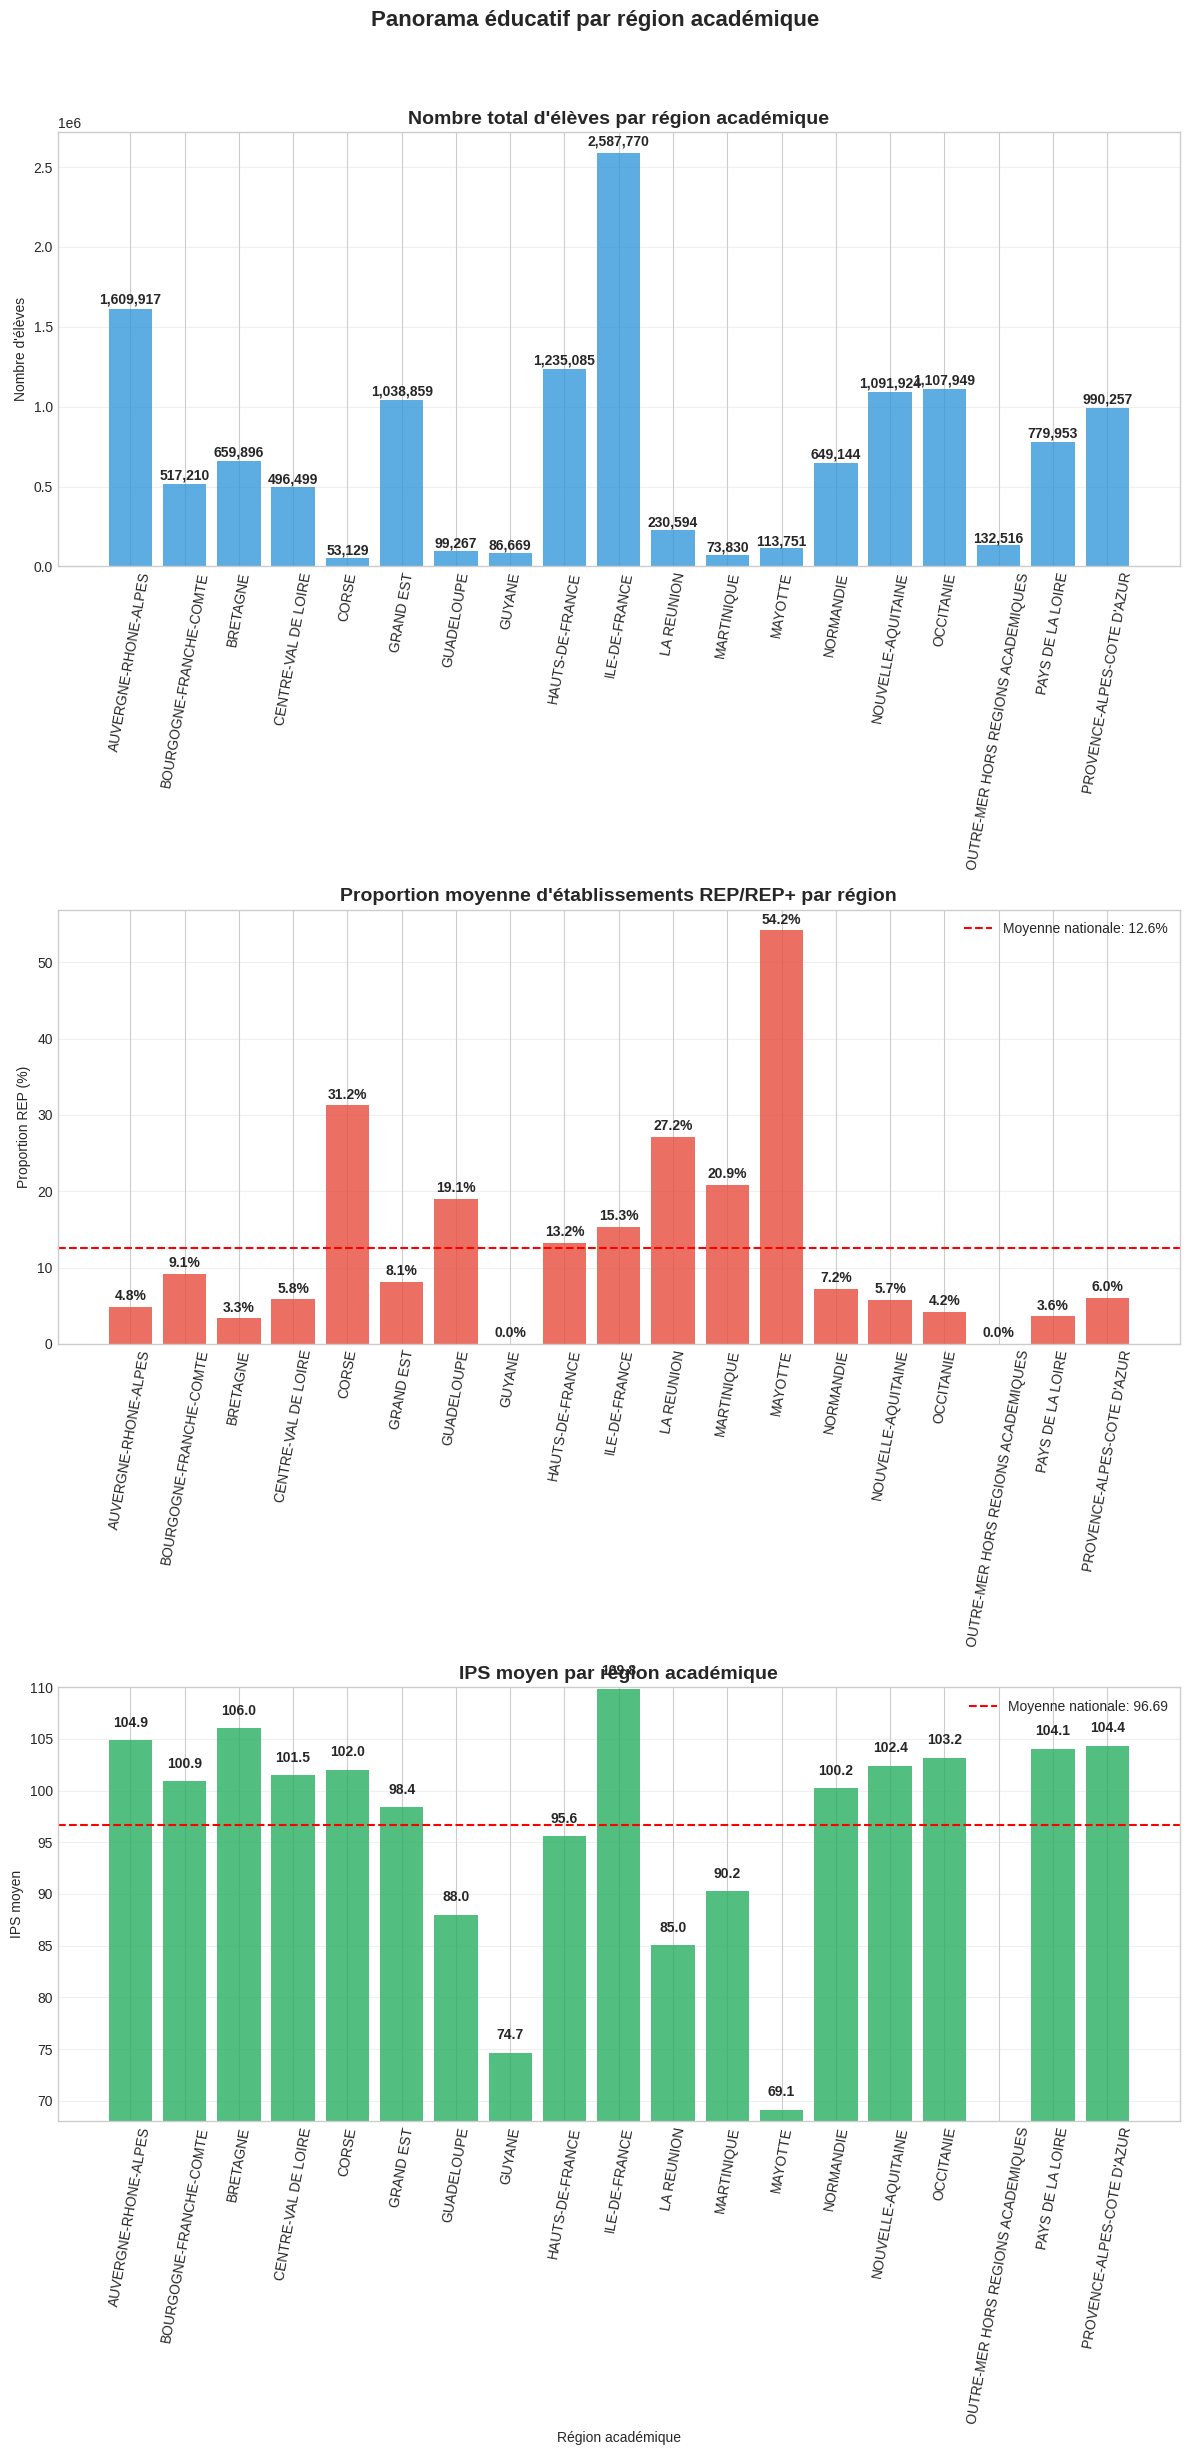

In [66]:
# Créer l'agrégation
region_stats = df.groupby('region_academique').agg(
    {
        'nb_eleve_par_etablissement':'mean'
        ,'nb_eleves':'sum'
        ,'avg_ips':'mean'
        ,'rep_percentage' : 'mean'
    }
)

# Graphique à 3 sous-graphiques
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 25))

# Graphique 1 : Nombre total d'élèves
bars1 = ax1.bar(region_stats.index, region_stats['nb_eleves'],
                color='#3498db', alpha=0.8)
ax1.set_title('Nombre total d\'élèves par région académique',
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Nombre d\'élèves')
ax1.tick_params(axis='x', rotation=80)
ax1.grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height:,.0f}', ha='center', va='bottom', fontweight='bold')

# Graphique 2 : Proportion REP moyenne
bars2 = ax2.bar(region_stats.index, region_stats['rep_percentage'],
                color='#e74c3c', alpha=0.8)
ax2.set_title('Proportion moyenne d\'établissements REP/REP+ par région',
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Proportion REP (%)')
ax2.tick_params(axis='x', rotation=80)
ax2.grid(axis='y', alpha=0.3)

# Ligne de référence (moyenne nationale)
moyenne_rep_nationale = region_stats['rep_percentage'].mean()
ax2.axhline(y=moyenne_rep_nationale, color='red', linestyle='--',
            label=f'Moyenne nationale: {moyenne_rep_nationale:.1f}%')
ax2.legend()

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Graphique 3 : IPS moyen
bars3 = ax3.bar(region_stats.index, region_stats['avg_ips'],
                color='#27ae60', alpha=0.8)
ax3.set_title('IPS moyen par région académique',
              fontsize=14, fontweight='bold')
ax3.set_ylabel('IPS moyen')
ax3.set_xlabel('Région académique')
ax3.tick_params(axis='x', rotation=80)
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim(68, 110)

# Ligne de référence (moyenne nationale)
moyenne_ips_nationale = region_stats['avg_ips'].mean()
ax3.axhline(y=moyenne_ips_nationale, color='red', linestyle='--',
            label=f'Moyenne nationale: {moyenne_ips_nationale:.2f}')
ax3.legend()

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Panorama éducatif par région académique',
             fontsize=16, fontweight='bold')

# Plus d'espacement entre les graphiques
plt.subplots_adjust(hspace=0.4)  # Espacement vertical augmenté !
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Laisser de la place pour le titre principal
plt.show()

## Analyse croisée : REP vs IPS

In [77]:
import plotly.express as px

# Création d'une copie du dataframe avec les pourcentages en %
df = region_stats.copy()
df['rep_percentage_percent'] = df['rep_percentage'] * 100

fig = px.scatter(
    df,
    x='rep_percentage_percent',
    y='avg_ips',
    size='nb_eleves',
    color='avg_ips',
    hover_name=df.index,
    color_continuous_scale='RdYlBu',
    labels={
        'rep_percentage_percent': "Proportion d'établissements REP/REP+ (%)",
        'avg_ips': 'IPS moyen',
        'nb_eleves': "Nombre d'élèves"
    },
    title="Relation entre proportion REP et IPS par région<br><sub>(Taille des bulles = nombre d'élèves)</sub>",
    width=900,
    height=600
)

# Ajout des lignes de référence
fig.add_shape(type="line",
              x0=df['rep_percentage_percent'].min(), x1=df['rep_percentage_percent'].max(),
              y0=moyenne_ips_nationale, y1=moyenne_ips_nationale,
              line=dict(color="red", dash="dash"))

fig.add_shape(type="line",
              x0=moyenne_rep_nationale, x1=moyenne_rep_nationale,
              y0=df['avg_ips'].min(), y1=df['avg_ips'].max(),
              line=dict(color="red", dash="dash"))

# Ajout de l'annotation de la corrélation
correlation = df['rep_percentage'].corr(df['avg_ips'])
fig.add_annotation(x=50, y=df['avg_ips'].min() + 5,  # Coordonnées approximatives
                   text=f"Corrélation REP-IPS: {correlation:.3f}",
                   showarrow=False,
                   bgcolor="yellow",
                   font=dict(size=12, color="black"))

fig.update_traces(marker=dict(line=dict(width=1, color='black')), opacity=0.7)

fig.show()


## Ranking et comparaisons

In [57]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Graphique interactif principal
fig = px.scatter(region_stats.reset_index(),
                x='rep_percentage',
                y='avg_ips',
                size='nb_eleves',
                hover_name='region_academique',
                hover_data={
                    'nb_eleves': ':,',
                    'rep_percentage': ':.3f',
                    'avg_ips': ':.2f'
                },
                title='Analyse REP vs IPS par région académique',
                labels={
                    'rep_percentage': 'Proportion REP',
                    'avg_ips': 'IPS moyen',
                    'nb_eleves': 'Nombre d\'élèves'
                })

# Ajouter les lignes de référence
fig.add_hline(y=moyenne_ips_nationale, line_dash="dash", line_color="red",
              annotation_text=f"IPS moyen national: {moyenne_ips_nationale:.2f}")
fig.add_vline(x=region_stats['rep_percentage'].mean(), line_dash="dash", line_color="red",
              annotation_text=f"REP moyen national: {region_stats['rep_percentage'].mean():.3f}")

fig.update_layout(width=900, height=600)
fig.show()

# Graphique en barres interactif
fig2 = make_subplots(
    rows=3, cols=1,
    subplot_titles=('Nombre d\'élèves', 'Proportion REP (%)', 'IPS moyen'),
    vertical_spacing=0.08
)

# Nombre d'élèves
fig2.add_trace(
    go.Bar(x=region_stats.index, y=region_stats['nb_eleves'],
           name='Élèves', marker_color='#3498db'),
    row=1, col=1
)

# Proportion REP
fig2.add_trace(
    go.Bar(x=region_stats.index, y=region_stats['rep_percentage']*100,
           name='REP %', marker_color='#e74c3c'),
    row=2, col=1
)

# IPS
fig2.add_trace(
    go.Bar(x=region_stats.index, y=region_stats['avg_ips'],
           name='IPS', marker_color='#27ae60'),
    row=3, col=1
)

fig2.update_layout(height=800, title_text="Indicateurs par région académique", showlegend=False)
fig2.update_xaxes(tickangle=45)
fig2.show()

# Synthèse

In [63]:
print("🎓 ANALYSE PAR RÉGION ACADÉMIQUE - SYNTHÈSE")
print("="*55)

# Calculer quelques métriques supplémentaires
region_stats_extended = region_stats.copy()
region_stats_extended['densite_rep'] = region_stats_extended['rep_percentage'] * region_stats_extended['nb_eleves']
region_stats_extended['score_composite'] = (
    (region_stats_extended['avg_ips'] - region_stats_extended['avg_ips'].min()) /
    (region_stats_extended['avg_ips'].max() - region_stats_extended['avg_ips'].min()) * 50 +
    (1 - region_stats_extended['rep_percentage']) * 50  # Inverse REP (moins = mieux)
)

# Trier par score composite
region_stats_extended = region_stats_extended.sort_values('score_composite', ascending=False)

print(f"\n📊 CLASSEMENT GÉNÉRAL (Score composite)")
print("-" * 45)
for i, (region, row) in enumerate(region_stats_extended.head(10).iterrows(), 1):
    print(f"{i:2d}. {region:<25} Score: {row['score_composite']:5.1f}")
    print(f"    Élèves: {row['nb_eleves']:8,} | REP: {row['rep_percentage']*100:5.1f}% | IPS: {row['avg_ips']:5.2f}")

print(f"\n🚨 RÉGIONS À DÉFIS MAJEURS (Fort REP + IPS faible)")
print("-" * 50)
defis = region_stats[(region_stats['rep_percentage'] > region_stats['rep_percentage'].quantile(0.75)) &
                    (region_stats['avg_ips'] < region_stats['avg_ips'].quantile(0.25))]
for region, row in defis.iterrows():
    print(f"• {region}: REP {row['rep_percentage']*100:.1f}% | IPS {row['avg_ips']:.2f} | {row['nb_eleves']:,} élèves")

print(f"\n🌟 RÉGIONS PRIVILÉGIÉES (Faible REP + IPS élevé)")
print("-" * 48)
privilegiees = region_stats[(region_stats['rep_percentage'] < region_stats['rep_percentage'].quantile(0.25)) &
                           (region_stats['avg_ips'] > region_stats['avg_ips'].quantile(0.75))]
for region, row in privilegiees.iterrows():
    print(f"• {region}: REP {row['rep_percentage']*100:.1f}% | IPS {row['avg_ips']:.2f} | {row['nb_eleves']:,} élèves")

print(f"\n📈 CORRÉLATIONS")
print("-" * 20)
print(f"REP ↔ IPS: {region_stats['rep_percentage'].corr(region_stats['avg_ips']):.3f}")
print(f"Élèves ↔ REP: {region_stats['nb_eleves'].corr(region_stats['rep_percentage']):.3f}")
print(f"Élèves ↔ IPS: {region_stats['nb_eleves'].corr(region_stats['avg_ips']):.3f}")

🎓 ANALYSE PAR RÉGION ACADÉMIQUE - SYNTHÈSE

📊 CLASSEMENT GÉNÉRAL (Score composite)
---------------------------------------------
 1. GUYANE                    Score:  56.8
    Élèves: 86,669.0 | REP:   0.0% | IPS: 74.65
 2. BRETAGNE                  Score: -71.9
    Élèves: 659,896.0 | REP: 334.5% | IPS: 106.04
 3. PAYS DE LA LOIRE          Score: -86.9
    Élèves: 779,953.0 | REP: 359.6% | IPS: 104.07
 4. OCCITANIE                 Score: -119.1
    Élèves: 1,107,949.0 | REP: 421.8% | IPS: 103.19
 5. AUVERGNE-RHONE-ALPES      Score: -146.6
    Élèves: 1,609,917.0 | REP: 481.1% | IPS: 104.89
 6. NOUVELLE-AQUITAINE        Score: -195.0
    Élèves: 1,091,924.0 | REP: 571.8% | IPS: 102.41
 7. CENTRE-VAL DE LOIRE       Score: -201.2
    Élèves: 496,499.0 | REP: 581.8% | IPS: 101.48
 8. PROVENCE-ALPES-COTE D'AZUR Score: -208.9
    Élèves: 990,257.0 | REP: 604.3% | IPS: 104.36
 9. NORMANDIE                 Score: -271.1
    Élèves: 649,144.0 | REP: 718.6% | IPS: 100.24
10. GRAND EST          

# Recap

<ipython-input-50-2374509214>:141: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



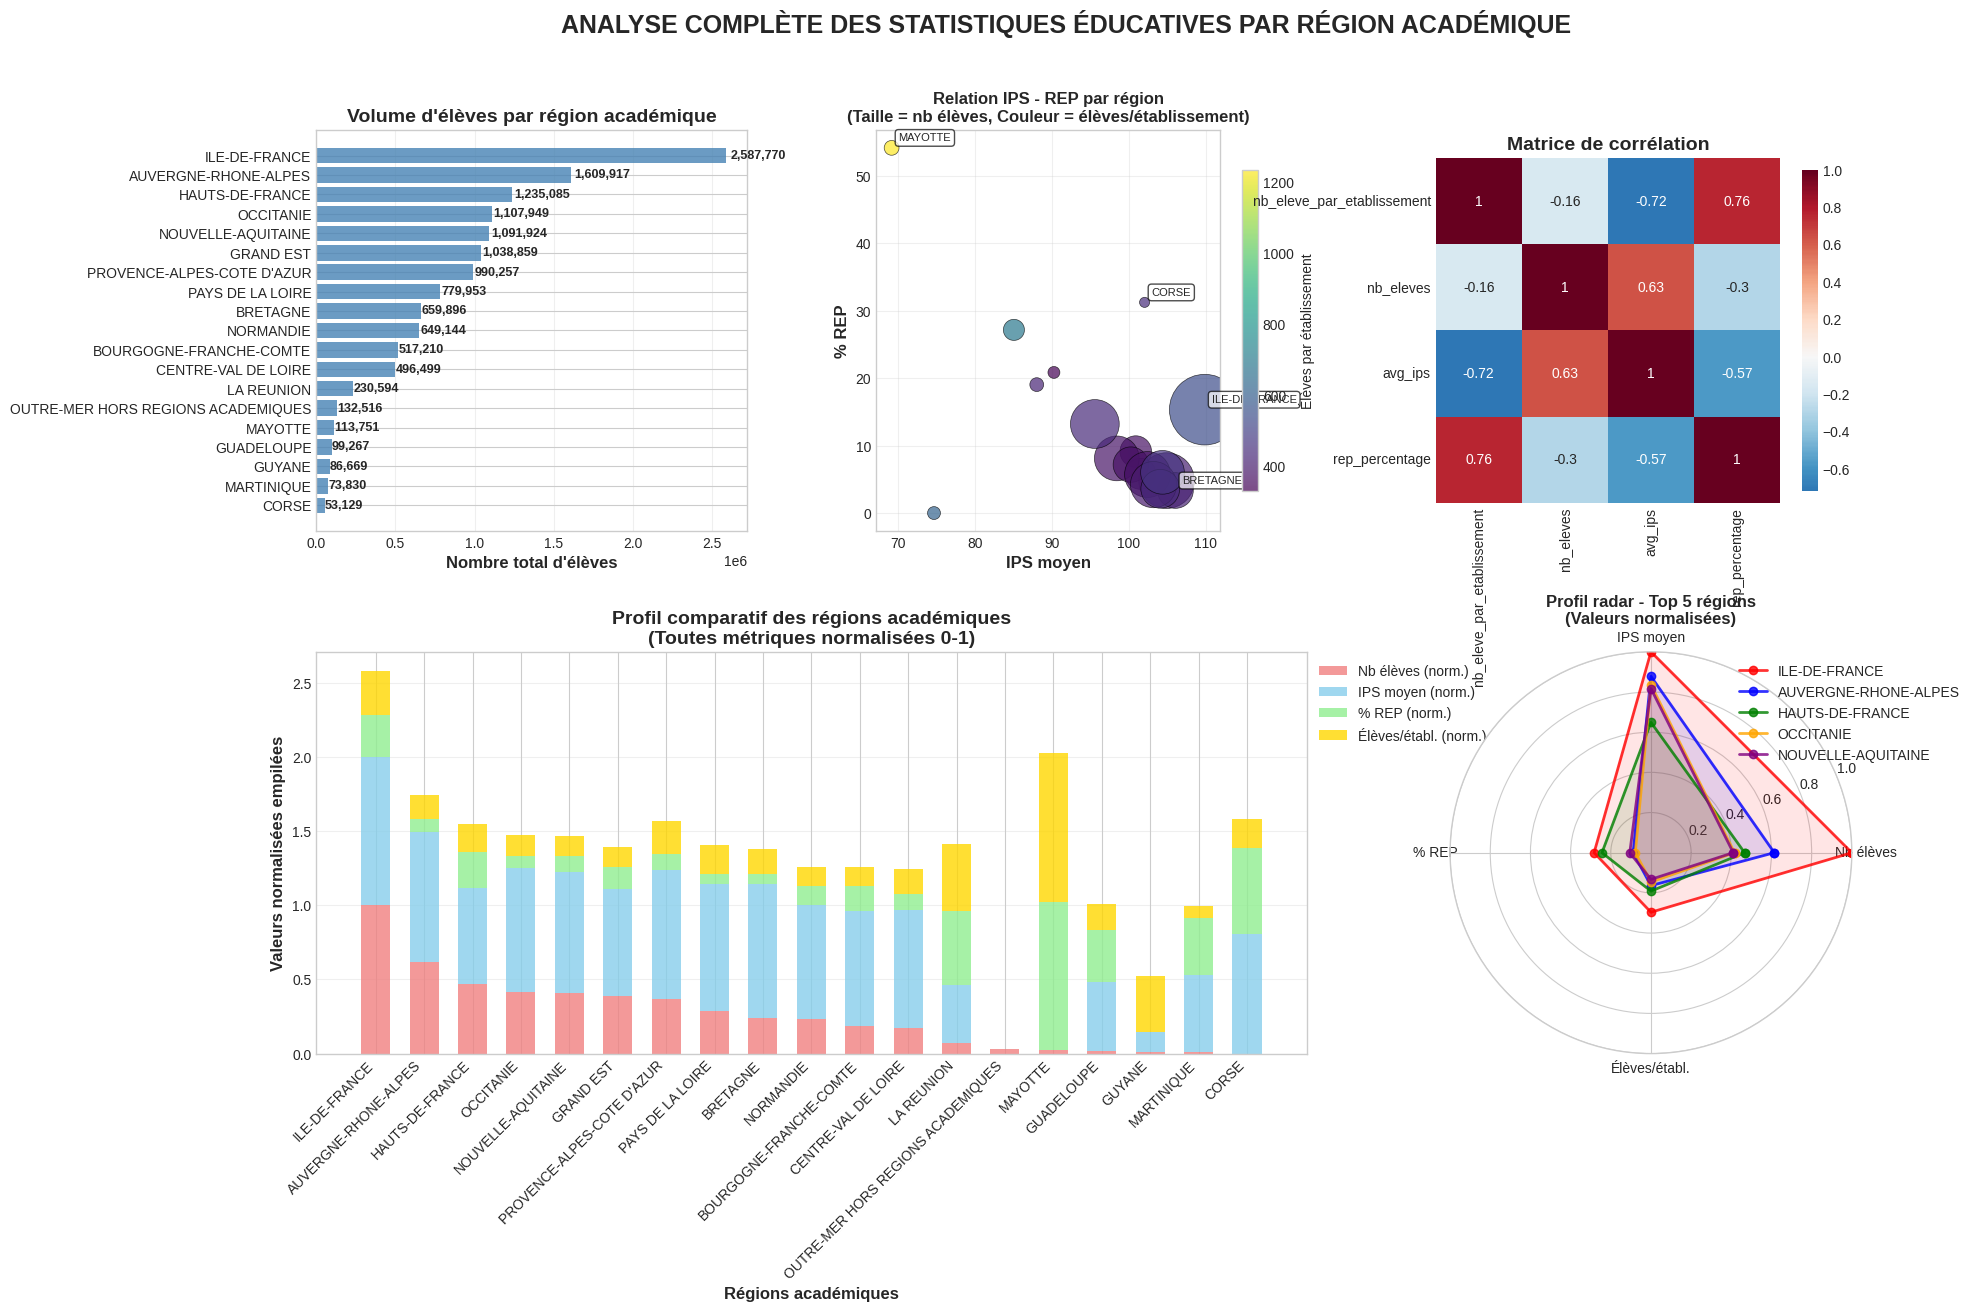

=== INSIGHTS CLÉS ===
Région avec le plus d'élèves: ILE-DE-FRANCE (2,587,770 élèves)
Région avec l'IPS le plus élevé: ILE-DE-FRANCE (IPS: 109.8)
Région avec le plus fort % REP: MAYOTTE (54.2%)
Corrélation IPS-REP: -0.572


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuration du style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Supposons que vous avez déjà vos données region_stats
# region_stats = df.groupby('region_academique').agg({...})

# Création d'une figure avec plusieurs sous-graphiques
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Graphique en barres horizontales pour le nombre total d'élèves
ax1 = fig.add_subplot(gs[0, 0])
region_stats_sorted = region_stats.sort_values('nb_eleves', ascending=True)
bars1 = ax1.barh(range(len(region_stats_sorted)), region_stats_sorted['nb_eleves'],
                 color='steelblue', alpha=0.8)
ax1.set_yticks(range(len(region_stats_sorted)))
ax1.set_yticklabels(region_stats_sorted.index, fontsize=10)
ax1.set_xlabel('Nombre total d\'élèves', fontsize=12, fontweight='bold')
ax1.set_title('Volume d\'élèves par région académique', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Ajout des valeurs sur les barres
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', ha='left', va='center', fontsize=9, fontweight='bold')

# 2. Scatter plot : IPS vs REP avec taille = nombre d'élèves
ax2 = fig.add_subplot(gs[0, 1])
scatter = ax2.scatter(region_stats['avg_ips'], region_stats['rep_percentage'],
                     s=region_stats['nb_eleves']/1000, # Taille proportionnelle
                     c=region_stats['nb_eleve_par_etablissement'],
                     cmap='viridis', alpha=0.7, edgecolors='black', linewidth=0.5)

ax2.set_xlabel('IPS moyen', fontsize=12, fontweight='bold')
ax2.set_ylabel('% REP', fontsize=12, fontweight='bold')
ax2.set_title('Relation IPS - REP par région\n(Taille = nb élèves, Couleur = élèves/établissement)',
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Colorbar pour le scatter
cbar = plt.colorbar(scatter, ax=ax2, shrink=0.8)
cbar.set_label('Élèves par établissement', fontsize=10)

# Annotations pour les points extrêmes
for idx, row in region_stats.iterrows():
    if (row['avg_ips'] > region_stats['avg_ips'].quantile(0.9) or
        row['rep_percentage'] > region_stats['rep_percentage'].quantile(0.9)):
        ax2.annotate(idx, (row['avg_ips'], row['rep_percentage']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

# 3. Heatmap de corrélation
ax3 = fig.add_subplot(gs[0, 2])
correlation_matrix = region_stats.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, ax=ax3, cbar_kws={'shrink': 0.8})
ax3.set_title('Matrice de corrélation', fontsize=14, fontweight='bold')

# 4. Graphique en barres empilées pour comparer les métriques normalisées
ax4 = fig.add_subplot(gs[1, :2])

# Normalisation des données pour comparaison
metrics_normalized = region_stats.copy()
for col in metrics_normalized.columns:
    metrics_normalized[col] = (metrics_normalized[col] - metrics_normalized[col].min()) / \
                             (metrics_normalized[col].max() - metrics_normalized[col].min())

metrics_normalized = metrics_normalized.sort_values('nb_eleves', ascending=False)

# Création du graphique empilé
x = np.arange(len(metrics_normalized))
width = 0.6

bottom_nb_eleves = metrics_normalized['nb_eleves']
bottom_avg_ips = bottom_nb_eleves + metrics_normalized['avg_ips']
bottom_rep = bottom_avg_ips + metrics_normalized['rep_percentage']

ax4.bar(x, metrics_normalized['nb_eleves'], width, label='Nb élèves (norm.)',
        color='lightcoral', alpha=0.8)
ax4.bar(x, metrics_normalized['avg_ips'], width, bottom=bottom_nb_eleves,
        label='IPS moyen (norm.)', color='skyblue', alpha=0.8)
ax4.bar(x, metrics_normalized['rep_percentage'], width, bottom=bottom_avg_ips,
        label='% REP (norm.)', color='lightgreen', alpha=0.8)
ax4.bar(x, metrics_normalized['nb_eleve_par_etablissement'], width, bottom=bottom_rep,
        label='Élèves/établ. (norm.)', color='gold', alpha=0.8)

ax4.set_xlabel('Régions académiques', fontsize=12, fontweight='bold')
ax4.set_ylabel('Valeurs normalisées empilées', fontsize=12, fontweight='bold')
ax4.set_title('Profil comparatif des régions académiques\n(Toutes métriques normalisées 0-1)',
              fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(metrics_normalized.index, rotation=45, ha='right')
ax4.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax4.grid(axis='y', alpha=0.3)

# 5. Radar chart pour les top 5 régions
ax5 = fig.add_subplot(gs[1, 2], projection='polar')

# Sélection des top 5 régions par nombre d'élèves
top_regions = region_stats.nlargest(5, 'nb_eleves')

# Normalisation pour le radar
radar_data = top_regions.copy()
for col in radar_data.columns:
    radar_data[col] = (radar_data[col] - region_stats[col].min()) / \
                     (region_stats[col].max() - region_stats[col].min())

# Configuration du radar
categories = ['Nb élèves', 'IPS moyen', '% REP', 'Élèves/établ.']
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Fermer le cercle

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, (region, row) in enumerate(radar_data.iterrows()):
    values = [row['nb_eleves'], row['avg_ips'], row['rep_percentage'], row['nb_eleve_par_etablissement']]
    values += values[:1]  # Fermer le cercle

    ax5.plot(angles, values, 'o-', linewidth=2, label=region, color=colors[i], alpha=0.8)
    ax5.fill(angles, values, alpha=0.1, color=colors[i])

ax5.set_xticks(angles[:-1])
ax5.set_xticklabels(categories, fontsize=10)
ax5.set_ylim(0, 1)
ax5.set_title('Profil radar - Top 5 régions\n(Valeurs normalisées)',
              fontsize=12, fontweight='bold', pad=20)
ax5.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.suptitle('ANALYSE COMPLÈTE DES STATISTIQUES ÉDUCATIVES PAR RÉGION ACADÉMIQUE',
             fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Analyse statistique complémentaire
print("=== INSIGHTS CLÉS ===")
print(f"Région avec le plus d'élèves: {region_stats['nb_eleves'].idxmax()} ({region_stats['nb_eleves'].max():,} élèves)")
print(f"Région avec l'IPS le plus élevé: {region_stats['avg_ips'].idxmax()} (IPS: {region_stats['avg_ips'].max():.1f})")
print(f"Région avec le plus fort % REP: {region_stats['rep_percentage'].idxmax()} ({region_stats['rep_percentage'].max():.1f}%)")
print(f"Corrélation IPS-REP: {region_stats['avg_ips'].corr(region_stats['rep_percentage']):.3f}")